<a href="https://colab.research.google.com/github/benisalla/BigMart-Data-Analysis-and-Prediction/blob/main/Building_a_Pipeline_for_Mortgage_Backed_Securities_Prepayment_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Mortgage-Backed-Securities-Prepayment-Risk</h1>
</center>

The Mortgage-Backed Securities Prepayment Risk data science project analyzes and models the risk of borrowers paying off mortgage loans early. It aims to predict prepayment behavior using historical mortgage data and machine learning techniques, helping investors manage risk and optimize returns.
<center>
  <img src="https://github-production-user-asset-6210df.s3.amazonaws.com/89405673/252298287-4c29917d-8f3c-42f6-9bb9-940cc2d2ba79.png"/>
</center>






**1) Hypothesis Generation**\
In this section, we will outline hypotheses regarding potential factors contributing to loan prepayment.


* **H1** : Borrowers with lower credit scores are more likely to refinance their mortgages when interest rates drop, leading to higher pre-payment risk for banks.

* **H2** : Borrowers with higher loan-to-value (LTV) ratios are more inclined to refinance their mortgages to take advantage of increased home equity or secure better interest rates, potentially leading to increased pre-payment risk.

* **H3** : Investors who own properties with lower occupancy rates (e.g., investment properties) are more likely to refinance or sell properties when they anticipate potential gains, contributing to higher pre-payment risk.

* **H4** : Adjustable-rate mortgages (ARMs) have higher pre-payment risk compared to fixed-rate mortgages (FRMs) due to the flexibility of ARMs to adjust interest rates over time. This flexibility may incentivize borrowers to refinance when rates decrease, leading to increased pre-payment risk.

* **H5** : Borrowers with higher debt-to-income (DTI) ratios are more sensitive to changes in their financial situation. They are more likely to refinance when they experience improvements, potentially increasing pre-payment risk for banks.

* **H6** : Mortgages originated during periods of historically low interest rates have higher pre-payment risk. Borrowers who obtained mortgages at these low rates may be more inclined to refinance when rates rise, contributing to higher pre-payment risk.


**2) Loading Data (CSV file)**



In [41]:
!pip install category_encoders

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# paths to test and train datasets
data_path = "/content/drive/MyDrive/LoanExport.csv"

# loading our data using pandas
main_data = pd.read_csv(data_path)
data = main_data

# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

<ipython-input-93-cf1c8d99358d>:13: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv(data_path)


In [43]:
print(f"shape of train data : {data.shape}")

shape of train data : (291451, 28)


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [45]:
# desplay first 5 rows
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [46]:
# desplay last 5 rows
data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


**3) checking the types of data**

In [47]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

**4) Dropping irrelevant columns**


In [94]:
cols_to_delete = ['MSA', 'SellerName', 'Units', 'PostalCode', 'LoanSeqNum']
for col in cols_to_delete:
  if col in data.columns:
    data = data.drop(col, axis=1)


# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

**5) Dropping duplicated rows**

In [95]:
duplicated_rows = data[data.duplicated]
print(f"number of duplicated rows : {duplicated_rows.shape[0]}") # fortunatly, our data is not duplicated
data = data.drop_duplicates()

number of duplicated rows : 42


**6) handling missing values**

In [96]:
# after a manual investigation on data, we have noticed some missing values
# but not nan (X : in MSA column for example)

for col in cat_cols:
  data[col] = data[col].str.lower().str.strip().replace(["x"], None)

In [78]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    78004
MaturityDate              0
MIP                       0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5404
ProductType               0
PropertyState             0
PropertyType             22
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            338
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [97]:
# let's calculate the ration of missing values
# (if the ration is significantly high then we will drop the entire column)
col_with_nan = data.columns[data.isna().any()]
for col in col_with_nan:
  train_null_ratio = data[col].isnull().sum()*100 / data.shape[0]
  print(f"null( {col:30}) / total ==> [should be delete ---> ({train_null_ratio > 20})] {train_null_ratio:.2f}%")

  if train_null_ratio > 20:
    data = data.drop(col, axis=1)
    col_with_nan = col_with_nan.drop(col)



# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

null( FirstTimeHomebuyer            ) / total ==> [should be delete ---> (True)] 26.77%
null( PPM                           ) / total ==> [should be delete ---> (False)] 1.85%
null( PropertyType                  ) / total ==> [should be delete ---> (False)] 0.01%
null( NumBorrowers                  ) / total ==> [should be delete ---> (False)] 0.12%


In [98]:
# cat_cols.drop("PostalCode"), col_with_nan.drop("PostalCode")
for col in col_with_nan:
  data[col] = data[col].fillna(data[col].mode()[0])

data.isnull().sum()

CreditScore          0
FirstPaymentDate     0
MaturityDate         0
MIP                  0
Occupancy            0
OCLTV                0
DTI                  0
OrigUPB              0
LTV                  0
OrigInterestRate     0
Channel              0
PPM                  0
ProductType          0
PropertyState        0
PropertyType         0
LoanPurpose          0
OrigLoanTerm         0
NumBorrowers         0
ServicerName         0
EverDelinquent       0
MonthsDelinquent     0
MonthsInRepayment    0
dtype: int64

**8) Categorical Variables encoding**

In [99]:
# let's check number of values in each cat column
hist_freq = data[cat_cols].nunique()
hist_freq

# LoanSeqNum : sames to have the highest number of categories

Occupancy         3
Channel           4
PPM               2
ProductType       1
PropertyState    53
PropertyType      6
LoanPurpose       3
NumBorrowers      2
ServicerName     20
dtype: int64

In [82]:
# ProductType takes one value all the time (constant)
# then we should drop it
if "ProductType" in cat_cols:
    data = data.drop("ProductType", axis=1)
    cat_cols = cat_cols.drop("ProductType")


In [105]:
hist_freq = data[cat_cols].nunique()

for col, freq in hist_freq.iteritems():
  if freq == 2:
    val1,val2 = data[col].unique()
    print(val1, val2)
    data[col] = data[col].replace({val1: 0, val2: 1})
    data[col] = data[col].astype(np.int64)


# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

0 1
0 1


<ipython-input-105-43986c8598b9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, freq in hist_freq.iteritems():


In [106]:
cat2one_hot = [col for col in cat_cols if data[col].nunique() < 5]
cat2target_encoding = cat_cols.drop(cat2one_hot)
cat2target_encoding

Index(['PropertyState', 'PropertyType', 'ServicerName'], dtype='object')

###### for onehot encoding

In [107]:
from sklearn.preprocessing import OneHotEncoder

#one hot encoder object
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_data = pd.DataFrame(OH_encoder.fit_transform(data[cat2one_hot]))

# One-hot encoding removed index; put it back
OH_cols_data.index = data.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_data = data.drop(cat_cols, axis=1)

# this is the categorical data that will be encoded later
# using the 'target encoder'
cat_2_TE_data = data[cat2target_encoding]

# Add one-hot encoded columns to numerical features
OH_X_data = pd.concat([num_X_data, cat_2_TE_data, OH_cols_data], axis=1)

# Ensure all columns have string type
OH_X_data.columns = OH_X_data.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
OH_X_data

,CreditScore,FirstPaymentDate,MaturityDate,MIP,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,...,1,2,3,4,5,6,7,8,9,10
0,0,199902,202901,25,89,27,117000,89,6.750,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,199902,202901,0,73,17,109000,73,6.500,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,199902,202901,0,75,16,88000,75,6.875,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,199902,202901,0,76,14,160000,76,6.875,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,199902,202901,0,78,18,109000,78,7.125,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,202902,0,60,32,90000,60,7.000,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
291447,840,200210,202904,0,73,0,267000,73,6.375,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
291448,840,200304,202904,0,73,31,87000,73,5.625,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
291449,845,199904,202903,0,80,54,88000,80,7.000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


###### for target encoding

In [109]:
# Encoding split
target_variable = "EverDelinquent"

X_encode = OH_X_data.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop(target_variable)

# Training split
X_pretrain = OH_X_data.drop(X_encode.index)
y_train = X_pretrain.pop(target_variable)

In [110]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(
    cols=cat2target_encoding,
    m=1.0,
)

# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)



In [111]:
clean_data = X_train
clean_data

,CreditScore,FirstPaymentDate,MaturityDate,MIP,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,...,1,2,3,4,5,6,7,8,9,10
0,0,199902,202901,25,89,27,117000,89,6.750,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,199902,202901,0,73,17,109000,73,6.500,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,199902,202901,0,75,16,88000,75,6.875,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,199902,202901,0,76,14,160000,76,6.875,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,199902,202901,0,78,18,109000,78,7.125,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,202902,0,60,32,90000,60,7.000,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
291447,840,200210,202904,0,73,0,267000,73,6.375,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
291448,840,200304,202904,0,73,31,87000,73,5.625,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
291449,845,199904,202903,0,80,54,88000,80,7.000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Text(0.5, 9.444444444444438, 'EverDelinquent')

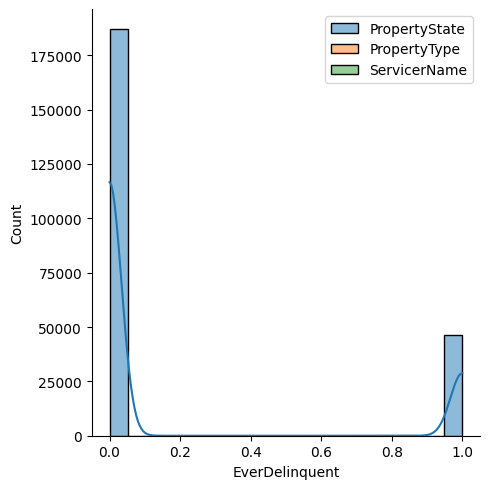

In [112]:
# comparing the distributions with the target
feature = encoder.cols

# Replace distplot with displot for kernel density plot
ax = sns.displot(y_train, kde=True)

# Replace distplot with histplot for histogram
ax = sns.histplot(X_train[feature], color='r', kde=False, stat="density")
ax.set_xlabel(target_variable)

**7) Detecting Outliers**

In [113]:
data.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000,291409.000000
mean,708.938379,199904.760625,202902.366979,9.217516,76.961624,30.033877,124946.559646,76.939079,6.926461,0.013455,359.835417,0.356087,0.197842,1.837949,60.805569
std,68.411989,13.822200,16.091662,12.648585,15.236272,13.203327,53657.302021,15.225416,0.343457,0.115214,2.287026,0.478842,0.398373,8.810005,46.143602
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,0.000000,301.000000,0.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,0.000000,360.000000,0.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,0.000000,360.000000,0.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,0.000000,360.000000,1.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,1.000000,361.000000,1.000000,1.000000,180.000000,212.000000


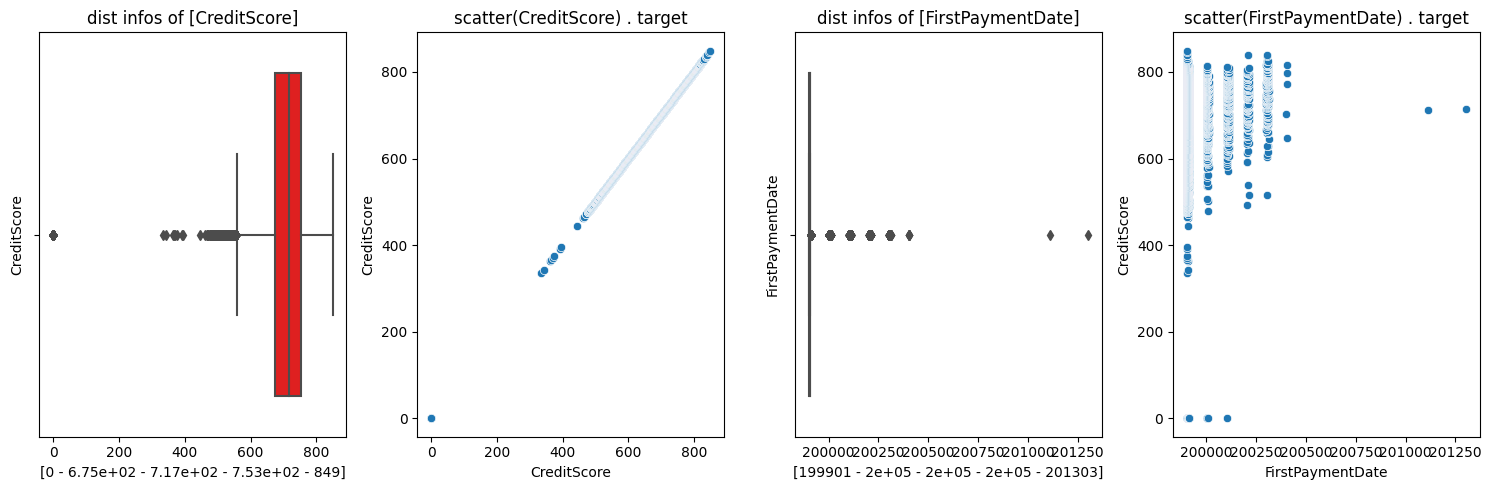

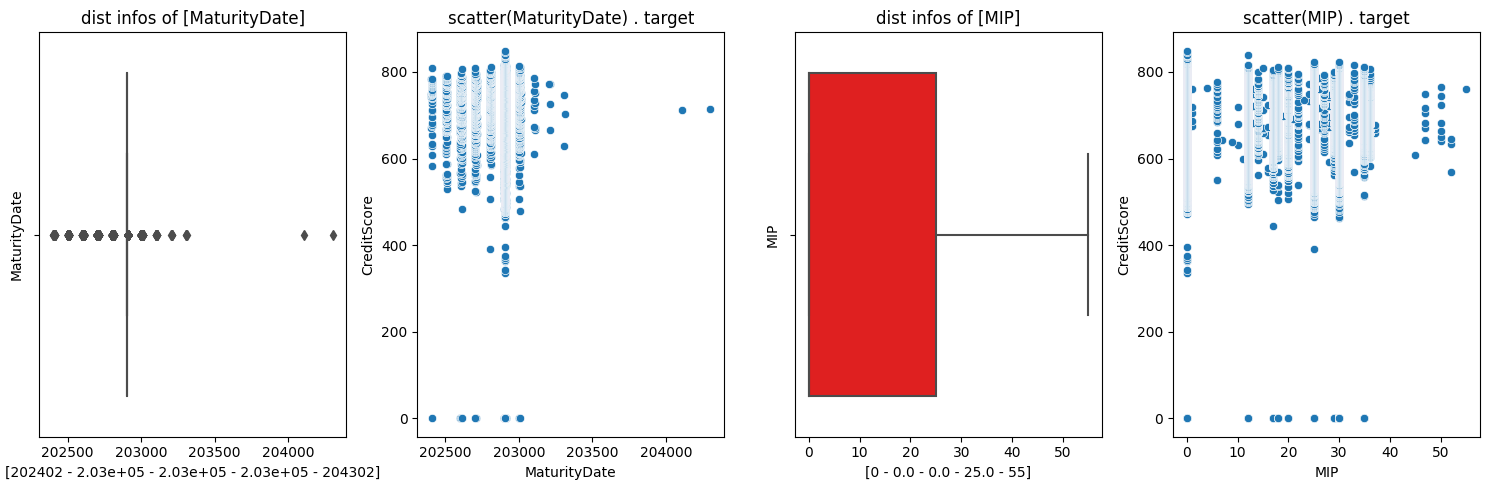

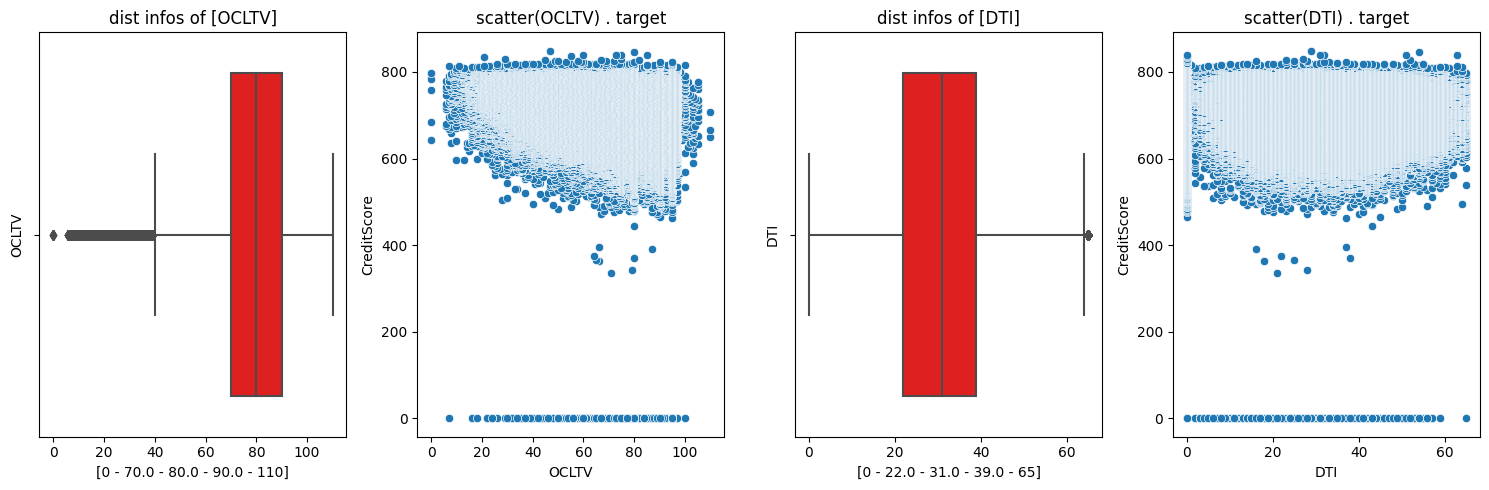

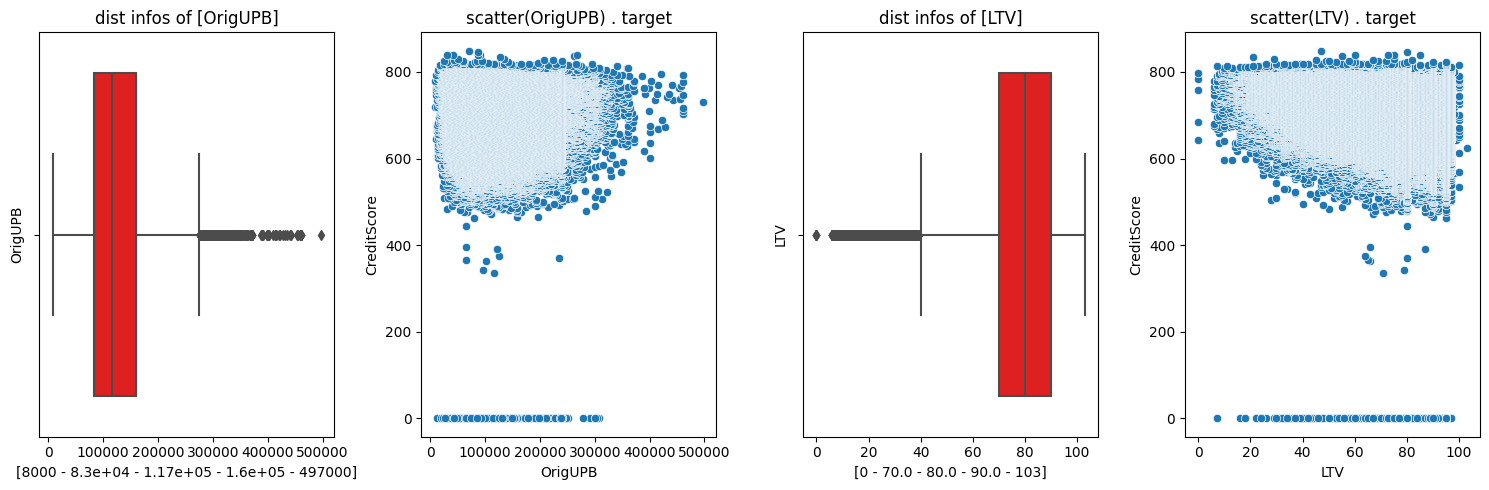

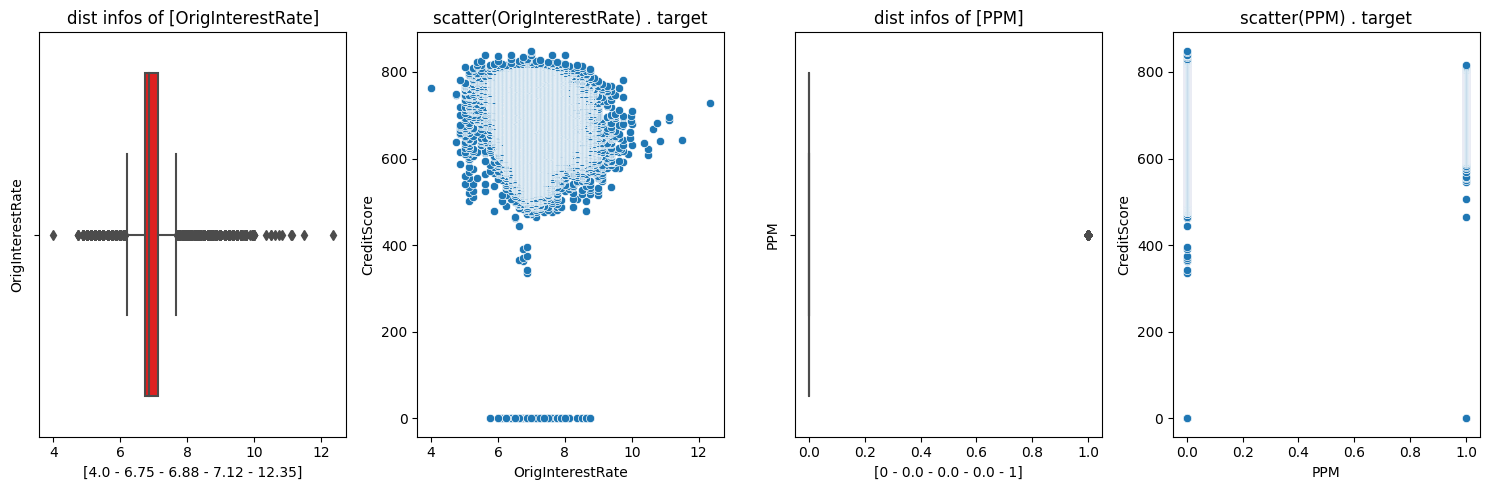

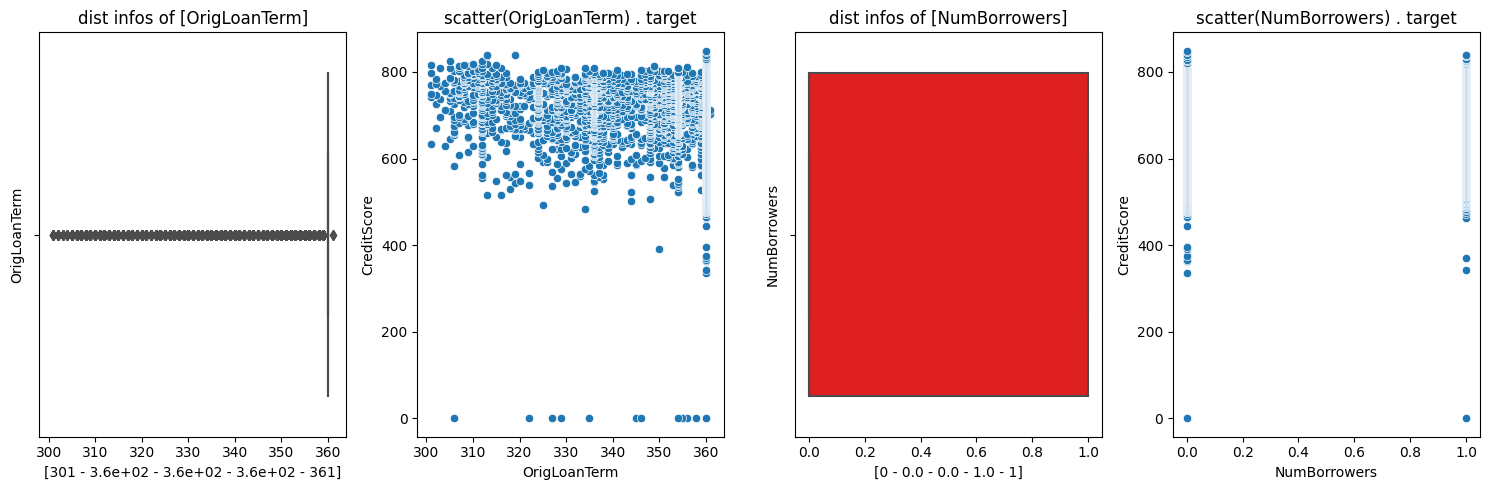

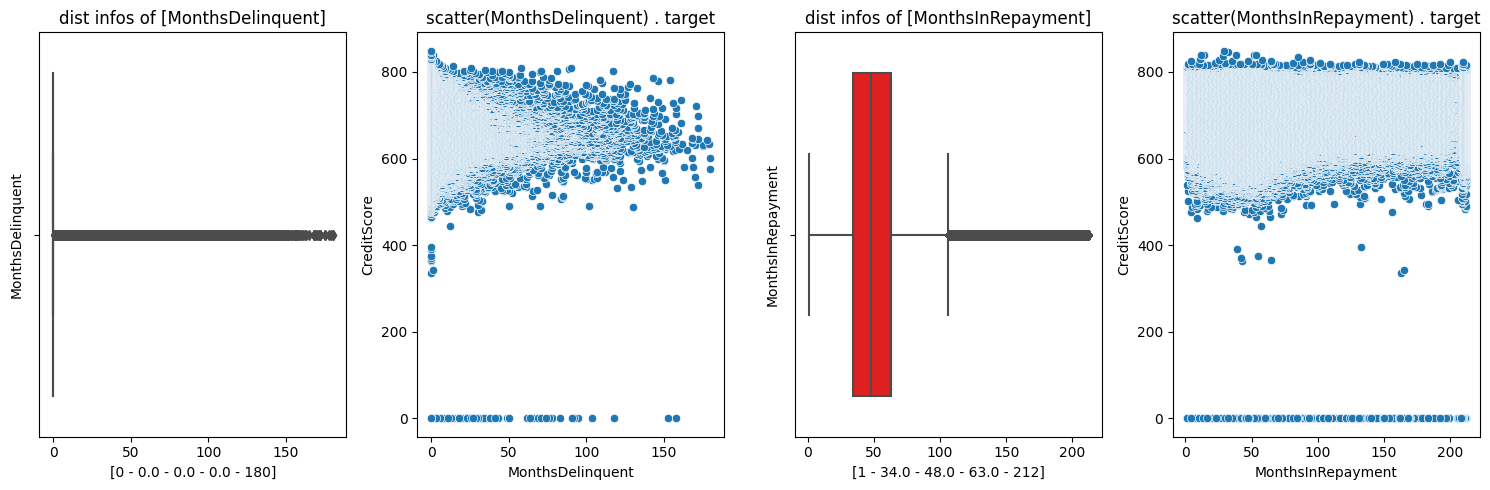

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'OCLTV',
       'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM', 'OrigLoanTerm',
       'NumBorrowers', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [114]:
# # dropping the target column
if target_variable in num_cols:
  num_cols = num_cols.drop(target_variable)

# # Create the scaler
scaler = StandardScaler()

# # normalazing the num cols
normalized_data = pd.DataFrame(data=scaler.fit_transform(data[num_cols]),
                               columns=data[num_cols].columns)

g_per_row = 2
for i in range(0, len(num_cols), g_per_row):
  num_graph = len(num_cols) - i if len(num_cols)-i < g_per_row else g_per_row
  fig, axes = plt.subplots(1, 2*g_per_row, figsize=(15, 5))
  for j,k in enumerate(range(0,2*num_graph-1,2)):
    col = num_cols[i+j]

    # building the boxplot (will gives us the boundaries of the meaningfull data)
    sns.boxplot(x=data[col], color='red', ax=axes[k])
    axes[k].set_title(f'dist infos of [{col}]')
    axes[k].set_ylabel(col)


    quantile = data[col].quantile([0.25,0.5,0.75])
    Q1 = quantile[0.25]
    Q3 = quantile[0.75]
    median = data[col].median()
    min = data[col].min()
    max = data[col].max()
    axes[k].set_xlabel(f"[{min} - {Q1:.3} - {median:.3} - {Q3:.3} - {max}]")


    # scatter col according to the target (another way to get an idea about outliers in our data)
    sns.scatterplot(data=data, x=col, y=data['CreditScore'], ax=axes[k+1])
    axes[k+1].set_title('scatter('+col+') . target')
    axes[k+1].set_xlabel(col)
    axes[k+1].set_ylabel("CreditScore")

  plt.tight_layout()
  print("\n\n")
  plt.show()

num_cols

In [115]:
from numpy.core.multiarray import min_scalar_type
# heler function
def remove_outlier(input_df, col):
    q1 = input_df[col].quantile(0.25)
    q3 = input_df[col].quantile(0.75)
    IQR = q3 - q1                         #Interquartile range
    min_scalar_type  = q1-1.5*IQR
    max = q3+1.5*IQR
    output_df = input_df.loc[(input_df[col] > min) & (input_df[col] < max)]
    return output_df

# loop over all cols with outliers, and remove them
# col_with_outliers = ["MonthsInRepayment","OrigInterestRate","LTV","OrigUPB","OCLTV","DTI"]
col_with_outliers = ["LTV","OrigUPB","OCLTV","DTI"]
for col in col_with_outliers:
  data = remove_outlier(data, col)

data.head()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,202901,25,o,89,27,117000,89,6.750,...,frm,il,sf,p,360,0,washingtonmutualbank,0,0,52
1,0,199902,202901,0,o,73,17,109000,73,6.500,...,frm,co,sf,n,360,1,chasehomefinancellc,0,0,144
2,0,199902,202901,0,o,75,16,88000,75,6.875,...,frm,ks,sf,n,360,0,washingtonmutualbank,0,0,67
3,0,199902,202901,0,o,76,14,160000,76,6.875,...,frm,ca,sf,n,360,0,gmacmtgecorp,0,0,35
4,0,199902,202901,0,o,78,18,109000,78,7.125,...,frm,nj,sf,n,360,0,gmacmtgecorp,0,0,54


In [116]:
data.shape
# 291451

(272608, 22)

**9) building the pipeline**

In [68]:
data = main_data.copy()

# our target
y = data['CreditScore']

# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

# 'one hot' + 'target encoding'
oh_cat_cols = pd.Index([col for col in cat_cols if data[col].nunique() < 5])
te_cat_cols = cat_cols.drop(cat2one_hot)

In [69]:
# Encoding split
X_encode = data.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop("CreditScore")

# Training split
X_pretrain = data.drop(X_encode.index)
y_train = X_pretrain.pop("CreditScore")

from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(
    cols=te_cat_cols,
    m=1.0,
)

# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
te_data = encoder.transform(X_pretrain, y_train)

train_X, val_X, train_y, val_y = train_test_split(te_data, y_train, random_state=1)
train_X["CreditScore"] = train_y

In [70]:
train_X

,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditScore
37452,199903,710.149940,202902,705.360690,0,1,O,70,42,130000,...,708.662223,C,360,2,708.272604,701.056288,0,0,59,648
200718,199905,710.149940,202904,716.114074,0,1,O,46,8,57000,...,708.662223,N,360,2,701.055546,705.876324,0,0,210,744
130187,199904,709.791212,202903,706.899282,30,1,O,95,30,67000,...,708.662223,P,360,1,694.164472,699.445302,0,0,30,709
275172,199904,709.791212,202903,706.968096,0,1,O,54,40,44000,...,708.662223,P,360,2,707.333756,710.954519,0,0,63,783
39809,199904,709.791212,202903,718.393002,30,1,O,93,46,79000,...,708.662223,P,360,2,707.226692,706.748212,1,3,17,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286421,199904,709.791212,202903,723.763782,0,1,O,40,24,238000,...,708.662223,N,360,2,716.836570,716.407263,0,0,61,796
6527,199905,709.791212,202904,705.360690,0,1,O,48,47,174000,...,708.662223,C,360,2,708.272604,706.412140,1,2,50,600
261020,199905,710.149940,202904,716.355960,0,1,O,69,40,61000,...,708.662223,C,360,2,675.192084,705.876324,1,2,185,773
287026,199904,697.783941,202903,706.968096,0,1,O,80,30,121000,...,708.662223,P,360,2,707.333756,710.954519,0,0,159,797


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from category_encoders import TargetEncoder


def impute_cat_func(X):
    print("===> in impute cat func")
    imputer = SimpleImputer(strategy="constant")
    X_imputed = imputer.fit_transform(X)
    return X_imputed

# def target_encode_cat_func(X, y, cols):
#     encoder = TargetEncoder(cols=cols)
#     X_encoded = encoder.fit_transform(X, y)
#     return X_encoded

def one_hot_encode_cat_func(X):
    print("===> in one hot encode cat func")
    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_encoded = encoder.fit_transform(X)
    return X_encoded

def impute_num_func(X):
    print("===> in impute num func")
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    return X_imputed

# FunctionTransformer
impute_cat_transformer = FunctionTransformer(impute_cat_func)
one_hot_encode_transformer = FunctionTransformer(one_hot_encode_cat_func)
# target_encode_transformer = FunctionTransformer(target_encode_cat_func)
impute_num_transformer = FunctionTransformer(impute_num_func)

# pipelines categorical variables
categorical_pipeline = Pipeline(
    steps=[
        ("impute", impute_cat_transformer),
        ("one_hot_encode", one_hot_encode_transformer),
        # ("target_encode", target_encode_transformer, te_cat_cols),
    ]
)
# pipeline of num variables
numeric_pipeline = Pipeline(
    steps=[
        ("impute", impute_num_transformer)
    ]
)

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

# now let's build our main pipeline called (bai pipeline)
bai_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # we will use the model here later
    ]
)

# bai pipeline
X_train_transformed = bai_pipeline.fit_transform(train_X, train_y)


===> in impute num func
===> in impute cat func
===> in one hot encode cat func


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
X_train_transformed[0]

array([   648., 199903., 202902., ...,      0.,      0.,      0.])